# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [285]:
import numpy as np
from scipy import optimize
import sympy as sm
from types import SimpleNamespace


import pandas as pd 
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
from modelproject import PrincipalAgent

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Principal Agent Model


Consider an economy that consists of a principal that wish to hire workers. There are two types of workers, resepctivly high and low productivity workers. The principal faces the following maximization problem: 
$$
\begin{align*}
\max_{w_H,e_H,w_L,e_l} \pi  & = q(R_H - w_h)+(1-q)(R_L - w_L)\\
& \text{s.t.} \\
\tag{$IR_H$}u_H(w_h,e_H) & \ge r_H \\ 
\tag{$IR_L$}u_L(w_L,e_L) & \ge r_L \\ 
\tag{$IC_H$}u_H(w_H,e_H) & \ge u(w_L,e_L)\\
\tag{$IC_L$}u_L(w_L,e_L) & \ge u_L(w_H,e_H)
\end{align*}
$$
where $w_i$ is the wage rate, $e_i$ is the level of education, $r_i$ is the outside utility, $u_i$ is the utility function and $R_i$ is the revenue added by worker i to the total firm revenue. The subscript $i$ of either L or H denotes if the agent has high ($H$) or low productivity ($L$).


The individual rationality constraints ($IR_H$/$IR_L$) ensures that the agents accept the offered contract. This implies that the utility of accepting the contract is higher than the outside utility. The incentive compatible constraints ($IC_H$/$IC_L$) ensures that the workers only accept the contract that is meant for them, i.e low productivity workers don't accept the contract meant for high productivity workers (and in principle also vise versa). 

We have assumed the functional forms of the various functions given below:

$$
\begin{align*}
u_H & = w - b_H * e_H \\
u_L & = w - b_L * e_L \\
R_H & = y_H + \alpha * e_H \\
R_L & = y_L + \alpha * e_L \\
\end{align*}
$$

where the variables are defined as above and $b_i$ is a scalar that denotes the size of the utility cost the agent i faces when taking an education. $\alpha$ is the effect of education on the firm revenue.

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

In [286]:
model = PrincipalAgent()
model.solve()
print(f'(w_L,e_L,w_H,e_H)=({model.sol.w_L:.3f},{model.sol.e_L:.3f},{model.sol.w_H:.3f}, {model.sol.e_H:.3f})')

(w_L,e_L,w_H,e_H)=(25.690,3.034,40.000, 12.302)


In [287]:
model.par.q = 0.5
model.solve()
print(f'(w_L,e_L,w_H,e_H)=({model.sol.w_L:.3f},{model.sol.e_L:.3f},{model.sol.w_H:.3f}, {model.sol.e_H:.3f})')

(w_L,e_L,w_H,e_H)=(25.690,3.034,40.000, 12.302)


In [288]:
model.find_indifference_curves()
print(model.e_vec)

[1.00000000e-08 2.02020212e-01 4.04040414e-01 6.06060616e-01
 8.08080818e-01 1.01010102e+00 1.21212122e+00 1.41414142e+00
 1.61616163e+00 1.81818183e+00 2.02020203e+00 2.22222223e+00
 2.42424243e+00 2.62626263e+00 2.82828284e+00 3.03030304e+00
 3.23232324e+00 3.43434344e+00 3.63636364e+00 3.83838385e+00
 4.04040405e+00 4.24242425e+00 4.44444445e+00 4.64646465e+00
 4.84848486e+00 5.05050506e+00 5.25252526e+00 5.45454546e+00
 5.65656566e+00 5.85858587e+00 6.06060607e+00 6.26262627e+00
 6.46464647e+00 6.66666667e+00 6.86868688e+00 7.07070708e+00
 7.27272728e+00 7.47474748e+00 7.67676768e+00 7.87878788e+00
 8.08080809e+00 8.28282829e+00 8.48484849e+00 8.68686869e+00
 8.88888889e+00 9.09090910e+00 9.29292930e+00 9.49494950e+00
 9.69696970e+00 9.89898990e+00 1.01010101e+01 1.03030303e+01
 1.05050505e+01 1.07070707e+01 1.09090909e+01 1.11111111e+01
 1.13131313e+01 1.15151515e+01 1.17171717e+01 1.19191919e+01
 1.21212121e+01 1.23232323e+01 1.25252525e+01 1.27272727e+01
 1.29292929e+01 1.313131

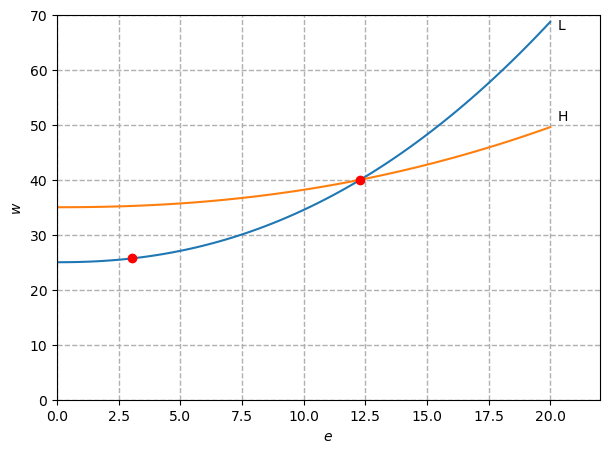

In [289]:
model.solve()
model.find_indifference_curves()
model.plot_everything()

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 